In [1]:
## Dependencies
from NanTex_backend.data_postprocessing.oneiros import Oneiros
from NanTex_backend.deep_learning.dl_model_assembly import assembled_model, final_layer_config

In [2]:
# set up the dreamer
Dreamer = Oneiros.with_ground_truth(data_type = 'npy',
                                    DEBUG=True)

Loading data...
Loading npy data...
Setting up metadata...
Checking outpath...
Retrieving outpath...


In [3]:
Dreamer.metadata

{'feature_cleanup_threshodls': {'feature_0': 0.1,
  'feature_1': 0.1,
  'feature_2': 0.1},
 'dynamic_thresholds': {'auto_calculate': True,
  'upper': 3,
  'lower': -2,
  'std_factor': 2},
 'patch_size': (256, 256),
 'dream_memory_shape': None,
 'patch_array_shape': None,
 'standardize': True,
 'normalize': False,
 'tensortype': torch.float32,
 'weights_only': True}

In [4]:
## Test Pre-Processing
Dreamer.__pre_process_data__()

Pre-processing data...
Adjusting image size...
Stripping images...
Standardizing images...
Memorizing patch array shape...
Patchifying images...
Reshaping images...


In [5]:
## Grab model
assembled_model.keys()

dict_keys(['model', 'activation', 'loss_fn', 'optimizer', 'device', 'writer'])

In [ ]:
## Load model
Dreamer.setup_model(model=assembled_model['model'],
                    activation=assembled_model['activation'],
                    device=assembled_model['device'],
                    output_channels=final_layer_config['out_channels'],
                    state_dict_path=None)
Dreamer.load_weights(None)

Setting up model...
To load pre-trained weights, call the 'load_weights' method.
Setting up model...
Memorizing dream shape...
Loading weights...
Checking path...
Fetching weights...
Checking path...
Setting up model...


In [6]:
Dreamer.quickstart_model()

Quickstarting model...
Checking path...
Setting up model...
Fetching weights...
Checking path...
Setting up model...
Memorizing dream shape...


In [7]:
Dreamer.__offload_data_to_device__()

Offloading data...


In [8]:
Dreamer.metadata

{'feature_cleanup_threshodls': {'feature_0': 0.1,
  'feature_1': 0.1,
  'feature_2': 0.1},
 'dynamic_thresholds': {'auto_calculate': True,
  'upper': 3,
  'lower': -2,
  'std_factor': 2},
 'patch_size': (256, 256),
 'dream_memory_shape': {'dream_0': (225, 3, 256, 256),
  'dream_1': (225, 3, 256, 256)},
 'patch_array_shape': {'dream_0': (15, 15), 'dream_1': (15, 15)},
 'standardize': True,
 'normalize': False,
 'tensortype': torch.float32,
 'weights_only': True}

In [9]:
Dreamer.__go_to_sleep__()

Dreaming of nature...:   0%|          | 0/2 [00:00<?, ?it/s]

Currently at dream_0...:   0%|          | 0/225 [00:00<?, ?it/s]

Currently at dream_1...:   0%|          | 0/225 [00:00<?, ?it/s]

In [10]:
Dreamer.__unpatchify_imgs__()

Unpatchifying images...


In [11]:
Dreamer.__compile_dream__()

Compiling dream...
Applying thresholds...
Applying dynamic thresholds...
Generating dynamic thresholds...
Generating dynamic thresholds...
Generating dynamic thresholds...
Generating dynamic thresholds...
Generating dynamic thresholds...
Generating dynamic thresholds...
Appending originals...


In [13]:
import numpy as np

In [14]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

Text(0.5, 1.0, 'Original')

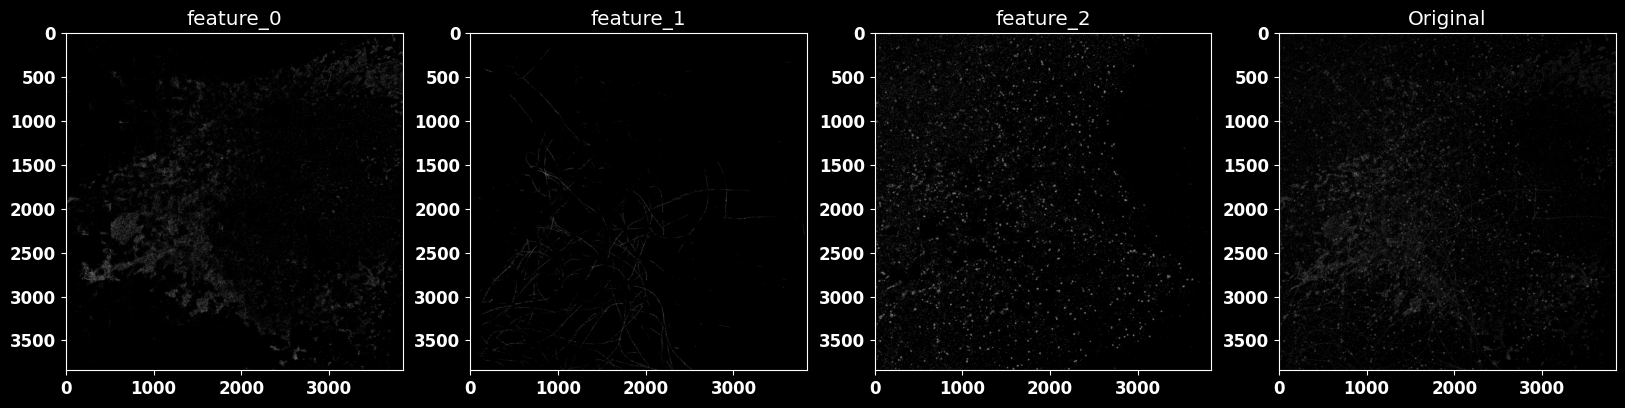

In [15]:
## Visualization

# Dependencies
from NanTex_backend.Util.pltStyler import pltStyler
import matplotlib.pyplot as plt

# control
Select_Dream:int = 1

# layout
pltStyler().enforece_stylesheet()

# figure
fig, axs = plt.subplots(1, final_layer_config['out_channels'] + 1, figsize=(5*(final_layer_config['out_channels'] + 1), 5))

# plot features
for i, key in enumerate(Dreamer.data_out[f"dream_{Select_Dream}"].keys()):
    if key == 'original':
        continue
    
    axs[i].imshow(Dreamer.data_out[f"dream_{Select_Dream}"][key] * 255, cmap='gray')
    axs[i].set_title(f"{key}")
    
# add original
axs[-1].imshow(normalize(Dreamer.data_out[f"dream_{Select_Dream}"]['original']) * 255, cmap='gray')
axs[-1].set_title('Original')